In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [46]:
test = pd.read_csv('test.csv')

In [47]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


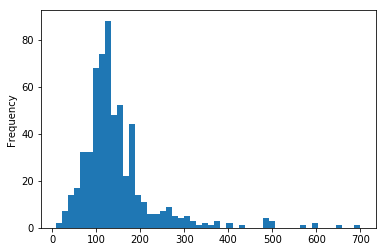

In [6]:
train['LoanAmount'].plot.hist(50)

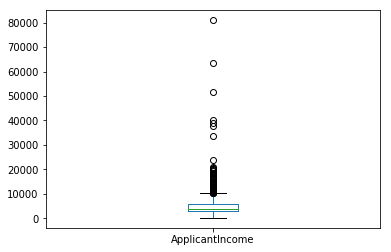

In [7]:
train['ApplicantIncome'].plot.box()

In [8]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
GM = train.groupby(['Gender', 'Credit_History'])['Loan_Status'].value_counts()

In [11]:
type(GM)

pandas.core.series.Series

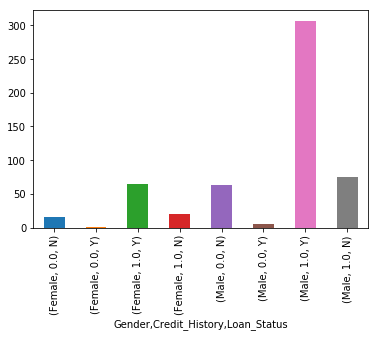

In [12]:
GM.plot.bar()

In [13]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [15]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


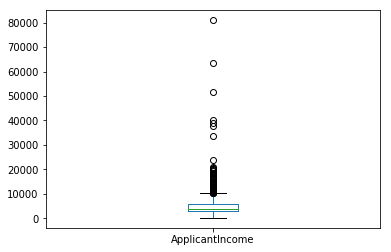

In [16]:
train['ApplicantIncome'].plot.box (by = 'Education')

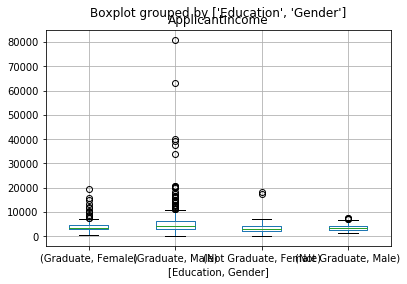

In [17]:
train.boxplot(column='ApplicantIncome', by = ['Education', 'Gender'])

In [18]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train[train.isnull().any(axis=1)] 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N


In [20]:
train.dropna(subset = ['Gender', 'Married', 'Dependents'], inplace=True)

In [21]:
train['Self_Employed'].fillna('No', inplace=True)

In [22]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

In [23]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace=True)

In [24]:
train.dropna(subset =['Credit_History'], inplace=True)
train['Credit_History'].dropna()#alternatief

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
17     0.0
18     1.0
19     1.0
20     0.0
21     1.0
22     0.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
31     1.0
32     1.0
33     1.0
      ... 
579    1.0
580    1.0
581    1.0
582    1.0
584    0.0
585    1.0
586    1.0
587    1.0
589    0.0
590    1.0
591    1.0
593    1.0
594    1.0
595    1.0
596    1.0
598    1.0
599    1.0
601    1.0
602    1.0
603    1.0
604    1.0
605    1.0
606    1.0
607    1.0
608    1.0
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 537, dtype: float64

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              537 non-null object
Gender               537 non-null object
Married              537 non-null object
Dependents           537 non-null object
Education            537 non-null object
Self_Employed        537 non-null object
ApplicantIncome      537 non-null int64
CoapplicantIncome    537 non-null float64
LoanAmount           537 non-null float64
Loan_Amount_Term     537 non-null float64
Credit_History       537 non-null float64
Property_Area        537 non-null object
Loan_Status          537 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 58.7+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [27]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 81.192%
Cross-Validation Score : 81.198%


In [29]:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 81.192%
Cross-Validation Score : 81.198%


In [30]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 81.192%
Cross-Validation Score : 81.198%


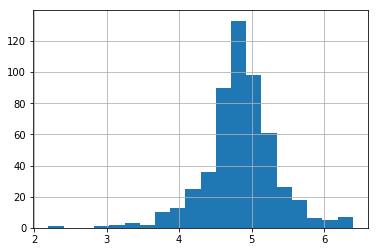

In [31]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [32]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 89.944%
Cross-Validation Score : 68.337%


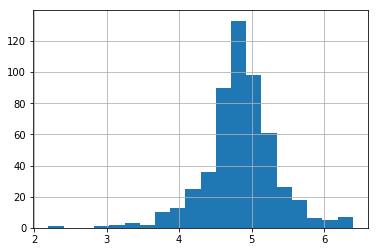

In [33]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['LoanAmount_log'].hist(bins=20)

In [34]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.780%


In [35]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.275770
TotalIncome_log     0.260053
LoanAmount_log      0.229725
Property_Area       0.048539
Loan_Amount_Term    0.047769
Dependents          0.047055
Married             0.024500
Education           0.024364
Gender              0.022188
Self_Employed       0.020036
dtype: float64


In [36]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 82.868%
Cross-Validation Score : 81.571%


In [45]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 81.192%
Cross-Validation Score : 81.198%


In [ ]:
logpredict()